# Exploratory Data Analysis

Chapter 3

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

import utils
from utils import decorate
from distribution import Pmf, Cdf

## Loading and validation


In [2]:
url17 = 'https://www.cdc.gov/brfss/annual_data/2017/llcp_varlayout_17_onecolumn.html'
url16 = 'https://www.cdc.gov/brfss/annual_data/2016/LLCP_VarLayout_16_OneColumn.html'

filename16 = 'LLCP2016ASC.zip'
filename17 = 'LLCP2017ASC.zip'

tables = pd.read_html(url17)

In [3]:
layout = tables[1]
layout.index = layout['Variable Name']
layout

,Starting Column,Variable Name,Field Length
Variable Name,,,
_STATE,1,_STATE,2
FMONTH,17,FMONTH,2
IDATE,19,IDATE,8
IMONTH,19,IMONTH,2
IDAY,21,IDAY,2
IYEAR,23,IYEAR,4
DISPCODE,32,DISPCODE,4
SEQNO,36,SEQNO,10
_PSU,36,_PSU,10


In [4]:
names = [ 'SEX', 'HTM4', 'WTKG3', 'INCOME2', '_LLCPWT' , '_AGEG5YR']

In [5]:
colspecs = []
for name in names:
    start, _, length = layout.loc[name]
    colspecs.append((start-1, start+length-1))
    
colspecs

[(124, 125),
 (2036, 2039),
 (2039, 2044),
 (179, 181),
 (1797, 1807),
 (2027, 2029)]

In [6]:
brfss = pd.read_fwf(filename17,
                    colspecs=colspecs, 
                    names=names,
                    compression='zip',
                    nrows=None)

brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR
0,2,165.0,7348.0,6.0,79.425947,11
1,1,180.0,9571.0,8.0,89.694580,10
2,1,188.0,8845.0,99.0,440.121376,11
3,2,170.0,7711.0,1.0,194.867164,11
4,2,165.0,6350.0,2.0,169.087888,10


In [7]:
brfss.shape

(450016, 6)

In [8]:
brfss['SEX'].value_counts().sort_index()

1    198725
2    251007
9       284
Name: SEX, dtype: int64

In [9]:
brfss['SEX'].replace([9], np.nan, inplace=True)

In [10]:
brfss['INCOME2'].value_counts().sort_index()

1.0      18346
2.0      19334
3.0      27735
4.0      34222
5.0      39751
6.0      53148
7.0      59632
8.0     122763
77.0     33328
99.0     38426
Name: INCOME2, dtype: int64

In [11]:
brfss['INCOME2'].replace([77, 99], np.nan, inplace=True)

In [12]:
brfss['WTKG3'] /= 100
brfss['WTKG3'].describe()

count    420145.000000
mean         81.586719
std          20.701024
min          22.680000
25%          67.590000
50%          79.380000
75%          91.630000
max         275.000000
Name: WTKG3, dtype: float64

In [13]:
weight = brfss['WTKG3']
weight.nsmallest(10)

202748    22.68
218895    22.68
246312    22.68
420587    22.68
446610    22.68
385527    23.13
99318     24.04
299845    24.04
173461    24.49
112834    24.95
Name: WTKG3, dtype: float64

In [14]:
weight.nlargest(10)

78560     275.00
155453    273.97
35729     272.61
70531     272.16
111021    272.16
220908    272.16
221451    272.16
229302    272.16
279941    272.16
305983    272.16
Name: WTKG3, dtype: float64

In [15]:
height = brfss['HTM4']
height.nsmallest(10)

18101     91.0
28286     91.0
126276    91.0
270173    91.0
351342    91.0
363762    91.0
368934    91.0
385478    91.0
384489    94.0
269650    97.0
Name: HTM4, dtype: float64

In [16]:
height.nlargest(10)

134893    236.0
230559    231.0
113037    226.0
148519    226.0
265919    226.0
294762    226.0
372189    226.0
38054     224.0
51866     224.0
271351    224.0
Name: HTM4, dtype: float64

In [17]:
brfss['HTM4'].describe()

count    433572.000000
mean        169.821863
std          10.614508
min          91.000000
25%         163.000000
50%         170.000000
75%         178.000000
max         236.000000
Name: HTM4, dtype: float64

In [18]:
brfss['_LLCPWT'].describe()

count    450016.000000
mean        568.098034
std        1119.545360
min           0.131624
25%          91.499675
50%         237.083009
75%         592.876546
max       45053.592700
Name: _LLCPWT, dtype: float64

In [19]:
brfss['_AGEG5YR'].describe()

count    450016.000000
mean          7.747962
std           3.557474
min           1.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          14.000000
Name: _AGEG5YR, dtype: float64

In [20]:
brfss['_AGEG5YR'].value_counts().sort_index()

1     26233
2     22388
3     24799
4     26297
5     25300
6     30134
7     37149
8     45124
9     49974
10    50020
11    41399
12    29269
13    35829
14     6101
Name: _AGEG5YR, dtype: int64

In [21]:
brfss['_AGEG5YR'].replace([14], np.nan, inplace=True)

In [22]:
np.random.seed(17)
sample = utils.resample_rows_weighted(brfss, '_LLCPWT')[:100000]

In [23]:
lower = np.arange(15, 85, 5)
upper = lower + 4

In [24]:
lower[1]= 18
lower = pd.Series(lower, index=range(len(lower)))
lower

0     15
1     18
2     25
3     30
4     35
5     40
6     45
7     50
8     55
9     60
10    65
11    70
12    75
13    80
dtype: int64

In [25]:
upper[-1] = 99
upper = pd.Series(upper, index=range(len(upper)))
upper

0     19
1     24
2     29
3     34
4     39
5     44
6     49
7     54
8     59
9     64
10    69
11    74
12    79
13    99
dtype: int64

In [26]:
midpoint = (lower + upper) / 2
midpoint

0     17.0
1     21.0
2     27.0
3     32.0
4     37.0
5     42.0
6     47.0
7     52.0
8     57.0
9     62.0
10    67.0
11    72.0
12    77.0
13    89.5
dtype: float64

In [27]:
age_code = sample['_AGEG5YR']

In [28]:
sample['AGE'] = midpoint[age_code].values
sample['AGE'].describe()

count    98794.000000
mean        47.720732
std         18.873769
min         21.000000
25%         32.000000
50%         47.000000
75%         62.000000
max         89.500000
Name: AGE, dtype: float64

In [29]:
def randint(lower, upper):
    for low, high in zip(lower, upper+1):
        try:
            yield np.random.randint(low, high)
        except ValueError:
            yield np.nan

In [30]:
sample.head(10)

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,32.0
305424,2.0,160.0,72.57,NaN,509.733354,13.0,89.5
302232,1.0,NaN,NaN,NaN,1657.213620,8.0,57.0
283720,2.0,152.0,108.86,8.0,3640.241970,2.0,27.0
26440,1.0,178.0,68.04,2.0,473.325486,6.0,47.0
125041,1.0,188.0,125.65,1.0,522.403225,7.0,52.0


In [31]:
sample.to_hdf('brfss.hdf5', 'brfss')

In [32]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 9.14 ms


In [33]:
brfss.shape

(100000, 7)

In [34]:
brfss.head()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,32.0


In [35]:
brfss.describe()

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
count,99938.000000,95143.000000,93404.000000,83447.000000,100000.000000,98794.000000,98794.000000
mean,1.513809,170.090443,81.202017,5.788656,2785.881001,6.103296,47.720732
std,0.499812,10.795080,20.945679,2.229189,3982.612684,3.601652,18.873769
min,1.000000,91.000000,23.130000,1.000000,5.774036,1.000000,21.000000
25%,1.000000,163.000000,66.220000,4.000000,579.932564,3.000000,32.000000
50%,2.000000,170.000000,78.930000,6.000000,1378.138470,6.000000,47.000000
75%,2.000000,178.000000,90.720000,8.000000,3202.380370,9.000000,62.000000
max,2.000000,226.000000,272.610000,8.000000,45053.592700,13.000000,89.500000


Text(0.5, 0, 'Height (cm)')

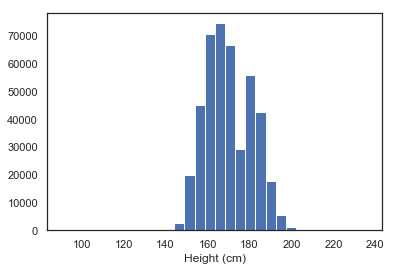

In [36]:
plt.hist(height.dropna(), bins=30)
plt.xlabel('Height (cm)')

In [37]:
short = brfss.HTM4<120
brfss[short]

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
297729,1.0,105.0,54.43,3.0,4307.570360,3.0,32.0
350597,2.0,105.0,63.50,NaN,158.108332,7.0,52.0
112220,2.0,105.0,77.11,4.0,2780.869330,4.0,37.0
386945,2.0,105.0,48.99,2.0,6249.133540,12.0,77.0
387626,1.0,105.0,92.53,1.0,2414.191940,9.0,62.0
384728,2.0,110.0,63.50,5.0,1363.372400,1.0,21.0
295218,2.0,104.0,79.38,1.0,1798.243170,3.0,32.0
384489,2.0,94.0,70.76,5.0,1247.899020,10.0,67.0
297729,1.0,105.0,54.43,3.0,4307.570360,3.0,32.0
385478,2.0,91.0,49.90,1.0,3177.585440,1.0,21.0


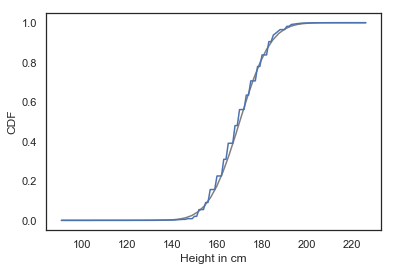

In [38]:
from distribution import Cdf
from scipy.stats import norm

# Extract height
height = brfss['HTM4']

# Make a norm object
dist = norm(height.mean(), height.std())

# Plot the model CDF
xs = np.linspace(height.min(), height.max())
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray')

# Plot the data CDF
Cdf(height).plot()
    
# Label the axes
plt.xlabel('Height in cm')
plt.ylabel('CDF')

plt.savefig('figs/height_cdf')

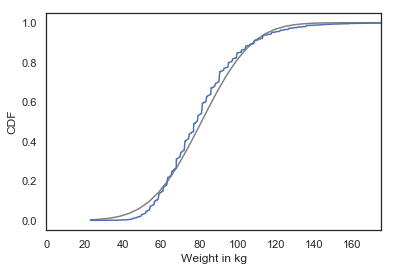

In [39]:
from distribution import Pmf, Cdf
from scipy.stats import norm

# Extract weight and compute its log
weight = brfss['WTKG3']

# Make a norm object
dist = norm(weight.mean(), weight.std())

# Plot the model CDF
xs = np.linspace(weight.min(), weight.max())
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray')

# Plot the data CDF
Cdf(weight).plot()
    
# Label the axes
plt.xlabel('Weight in kg')
plt.ylabel('CDF')
plt.xlim([0, 175])

plt.savefig('figs/weight_cdf')

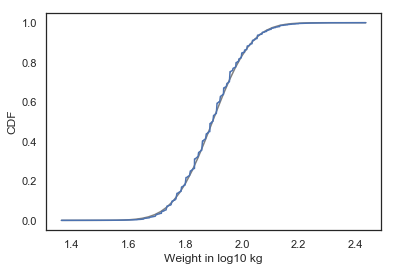

In [40]:
from distribution import Pmf, Cdf
from scipy.stats import norm

# Extract weight and compute its log
log_weight = np.log10(brfss['WTKG3'])

# Make a norm object
dist = norm(log_weight.mean(), log_weight.std())

# Plot the model CDF
xs = np.linspace(log_weight.min(), log_weight.max())
ys = dist.cdf(xs)
plt.plot(xs, ys, color='gray')

# Plot the data CDF
Cdf(log_weight).plot()
    
# Label the axes
plt.xlabel('Weight in log10 kg')
plt.ylabel('CDF')

plt.savefig('figs/log_weight_cdf')

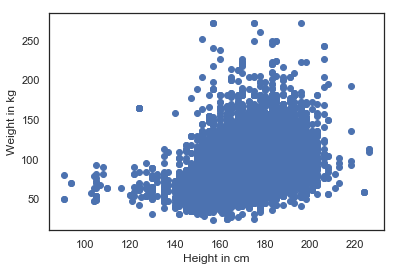

In [41]:
plt.scatter(height, weight)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter1.png')

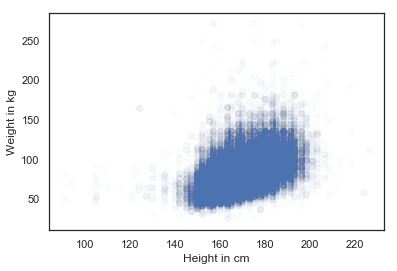

In [42]:
plt.scatter(height, weight, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter2.png')

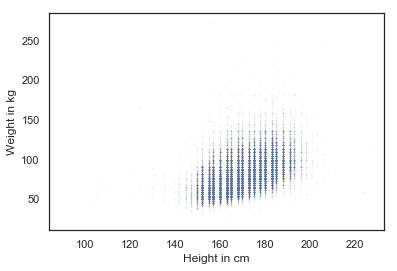

In [43]:
plt.scatter(height, weight, s=1, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter1.png')

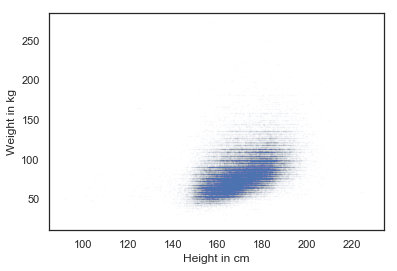

In [44]:
height_jitter = height + np.random.normal(0, 2, size=len(height))
plt.scatter(height_jitter, weight, s=1, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter3.png')

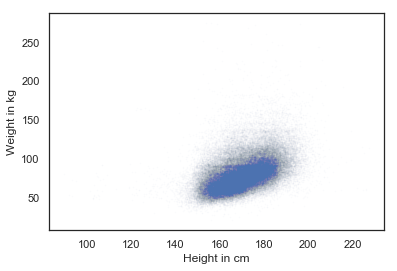

In [45]:
height_jitter = height + np.random.normal(0, 2, size=len(height))
weight_jitter = weight + np.random.normal(0, 2, size=len(weight))
plt.scatter(height_jitter, weight_jitter, s=1, alpha=0.01)

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter4.png')

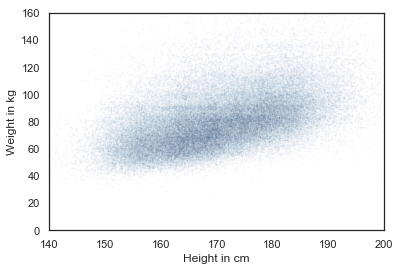

In [46]:
height_jitter = height + np.random.normal(0, 2, size=len(height))
plt.scatter(height_jitter, weight_jitter, s=1, alpha=0.02)
plt.axis([140, 200, 0, 160])

plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')

plt.savefig('figs/height_weight_scatter5.png')

Text(0, 0.5, 'Weight in kg')

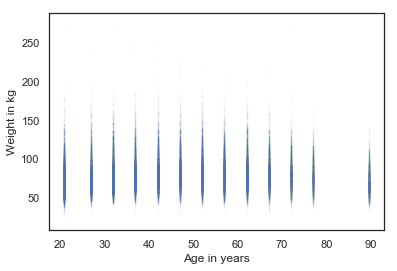

In [49]:
age = brfss['AGE']
plt.scatter(age, weight_jitter, s=1, alpha=0.02)

plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

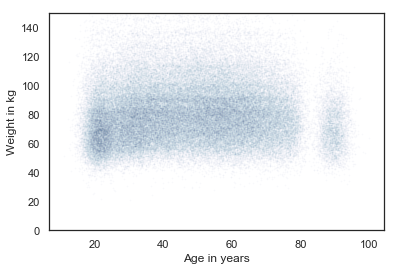

In [54]:
age = brfss['AGE']
age_jitter = age + np.random.normal(0, 2.5, len(age))
plt.scatter(age_jitter, weight_jitter, s=1, alpha=0.02)

plt.ylim([0,150])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

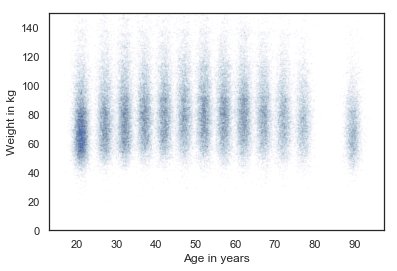

In [55]:
age = brfss['AGE']
age_jitter = age + np.random.normal(0, 1, len(age))
plt.scatter(age_jitter, weight_jitter, s=1, alpha=0.02)

plt.ylim([0, 150])
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

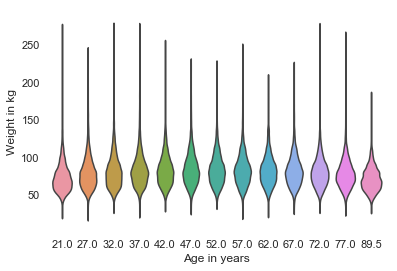

In [116]:
data = brfss.dropna(subset=['AGE', 'WTKG3'])

sns.violinplot(x='AGE', y='WTKG3', data=data, inner=None)

sns.despine(left=True, bottom=True)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

Text(0, 0.5, 'Weight in kg')

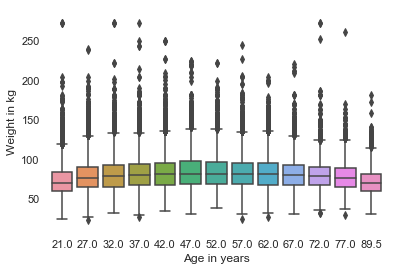

In [117]:
sns.boxplot(x='AGE', y='WTKG3', data=data)

sns.despine(left=True, bottom=True)
plt.xlabel('Age in years')
plt.ylabel('Weight in kg')

In [78]:
grouped = brfss.groupby('AGE')

for name, group in grouped['WTKG3']:
    print(name, len(group))

21.0 12566
27.0 8116
32.0 9321
37.0 8067
42.0 8039
47.0 7284
52.0 8652
57.0 8200
62.0 8182
67.0 6583
72.0 5365
77.0 4053
89.5 4366


In [100]:
ps = np.array([95, 75, 50, 25, 5])

for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).percentile(ps)
    print(name, percentiles)

21.0 [108.86  83.91  70.31  59.87  49.9 ]
27.0 [117.93  90.72  77.11  65.    52.62]
32.0 [122.47  92.99  79.38  65.77  54.43]
37.0 [122.47  94.35  80.74  68.04  56.25]
42.0 [122.47  95.25  81.65  68.04  55.34]
47.0 [124.74  97.52  81.65  69.4   55.79]
52.0 [123.38  96.62  81.65  68.95  55.79]
57.0 [117.93  95.25  81.65  68.49  54.43]
62.0 [122.47  95.25  81.65  68.04  54.43]
67.0 [117.93  92.99  80.74  68.04  54.43]
72.0 [113.4   90.72  79.38  68.04  53.52]
77.0 [111.13  89.81  77.11  65.77  52.16]
89.5 [99.79 81.65 70.31 59.87 49.44]


In [101]:
res = []
for name, group in grouped['WTKG3']:
    percentiles = Cdf(group).percentile(ps)
    res.append(percentiles)

In [102]:
xs = grouped.groups.keys()
xs

dict_keys([21.0, 27.0, 32.0, 37.0, 42.0, 47.0, 52.0, 57.0, 62.0, 67.0, 72.0, 77.0, 89.5])

In [103]:
rows = np.transpose(res)

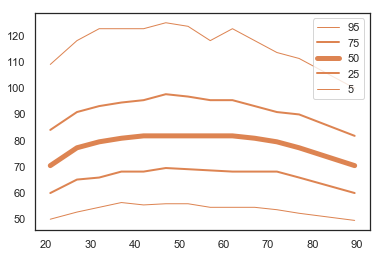

In [106]:
width = [1,2,5,2,1]

for i, qs in enumerate(rows):
    plt.plot(xs, qs, label=ps[i], linewidth=width[i], color='C1')
    
plt.legend()